<a href="https://colab.research.google.com/github/YemmaSandhya/portfolio-template/blob/main/MINOR_PROJECT_TEAM_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## lets download and import ntkl
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## metrics evaluated
from sklearn import metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## download packags
nltk.download(['punkt', 'wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_json('/content/Dataset for Detection of Cyber-Trolls.json', lines= True)
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [ ]:
df['label'] = df['annotation'].apply(lambda x: x.get('label'))
df['label'] = df.label.apply(lambda x: int(x[0]))

df.head()

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1


In [ ]:
df.shape

(20001, 4)

In [ ]:
## lets explore

df['extras'].unique()

array([nan])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   content     20001 non-null  object 
 1   annotation  20001 non-null  object 
 2   extras      0 non-null      float64
 3   label       20001 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 625.2+ KB


In [ ]:
df = df.drop(['annotation', 'extras'], axis=1)

In [ ]:
def load_data(path):
    df = pd.read_json(path, lines= True)

    df["label"] = df.annotation.apply(lambda x: x.get('label'))
    df["label"] = df.label.apply(lambda x: x[0])

    X = df.content.values
    y = df.label.values

    return X, y

In [ ]:
def tokenize(text):

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

## Random Forest Classifier

In [ ]:
url = '/content/Dataset for Detection of Cyber-Trolls.json'
X, y = load_data(url)
X_train, X_test, y_train, y_test = train_test_split(X, y)

vect = CountVectorizer(tokenizer=tokenize)
tfidf = TfidfTransformer()
RandomForestModel = RandomForestClassifier()

# train classifier
X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)
RandomForestModel.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


RandomForestClassifier()

In [ ]:
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)
y_pred = RandomForestModel.predict(X_test_tfidf)

<Axes: >

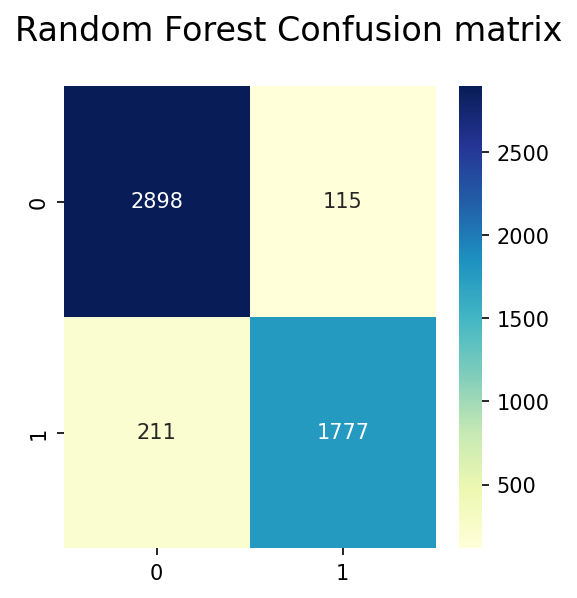

In [ ]:
## confusion matrix

plt.figure(figsize=(4, 4), dpi=150)
plt.suptitle('Random Forest Confusion matrix', size=16, y=1.00);
con = confusion_matrix(y_test.tolist(), y_pred.tolist())
sns.heatmap(con, cmap='YlGnBu', annot=True, fmt = 'd')

In [ ]:
print("Accuracy Score ---> ", accuracy_score(y_test, y_pred))
print("Precision Score --> ", precision_score(y_test, y_pred, average="binary", pos_label='1'))
print("Recall Score -----> ", recall_score(y_test, y_pred, average="binary", pos_label='1'))
print("F1 Score ---------> ", f1_score(y_test, y_pred, average="binary", pos_label='1'))

Accuracy Score --->  0.9348130373925215
Precision Score -->  0.9392177589852009
Recall Score ----->  0.8938631790744467
F1 Score --------->  0.9159793814432989


## Logistic Regression

In [ ]:
# train classifier
X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)
LogitRegressionModel = LogisticRegression()
LogitRegressionModel.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


LogisticRegression()

In [ ]:
## lets test on test data
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)
y_pred = LogitRegressionModel.predict(X_test_tfidf)

<Axes: >

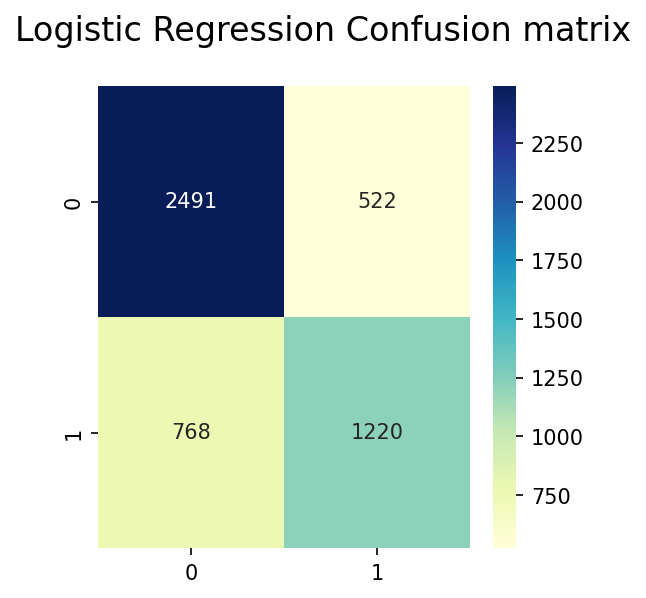

In [ ]:
## confusion matrix
plt.figure(figsize=(4, 4), dpi=150)
plt.suptitle('Logistic Regression Confusion matrix', size=16, y=1.00);
con = confusion_matrix(y_test.tolist(), y_pred.tolist())
sns.heatmap(con, cmap='YlGnBu', annot=True, fmt = 'd')

In [ ]:
print("Accuracy Score ---> ", accuracy_score(y_test, y_pred))
print("Precision Score --> ", precision_score(y_test, y_pred, average="binary", pos_label='1'))
print("Recall Score -----> ", recall_score(y_test, y_pred, average="binary", pos_label='1'))
print("F1 Score ---------> ", f1_score(y_test, y_pred, average="binary", pos_label='1'))

Accuracy Score --->  0.7420515896820636
Precision Score -->  0.7003444316877153
Recall Score ----->  0.613682092555332
F1 Score --------->  0.6541554959785523


##K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier object with a specified number of neighbors (k)
k_neighbors = 5  # You can adjust the number of neighbors
KNNModel = KNeighborsClassifier(n_neighbors=k_neighbors)

# Train the KNN Classifier
X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)
KNNModel.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


KNeighborsClassifier()

In [ ]:
# Transform the test data using the same vectorizer and TF-IDF transformer
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)

# Predict using the KNN Classifier
y_pred = KNNModel.predict(X_test_tfidf)

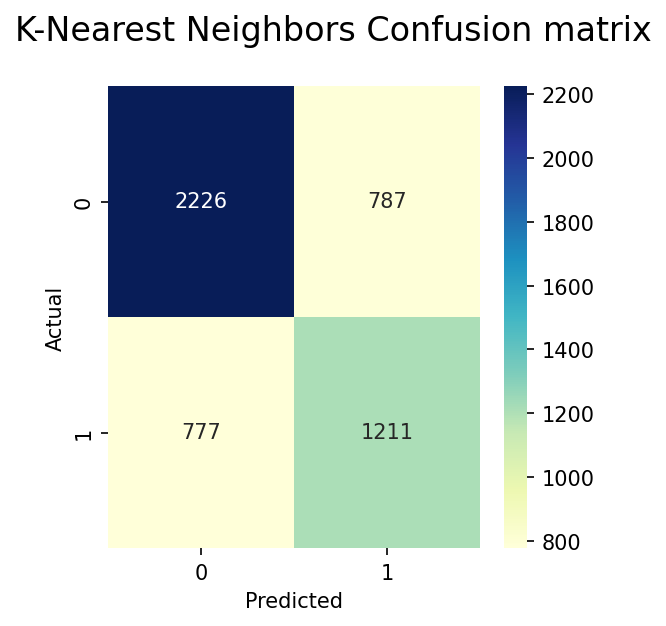

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
confusion = confusion_matrix(y_test.tolist(), y_pred.tolist())

# Plot the confusion matrix
plt.figure(figsize=(4, 4), dpi=150)
plt.suptitle('K-Nearest Neighbors Confusion matrix', size=16, y=1.00)
sns.heatmap(confusion, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score ---> ", accuracy)
precision = precision_score(y_test, y_pred, average="binary", pos_label='1')
print("Precision Score --> ", precision)
recall = recall_score(y_test, y_pred, average="binary", pos_label='1')
print("Recall Score -----> ", recall)
f1 = f1_score(y_test, y_pred, average="binary", pos_label='1')
print("F1 Score ---------> ", f1)

Accuracy Score --->  0.6872625474905019
Precision Score -->  0.6061061061061062
Recall Score ----->  0.6091549295774648
F1 Score --------->  0.6076266934269945


# **HIGHEST ACCURACY MODEL PREDICTION**

In [ ]:
# predict on test data
X_test_counts = vect.transform(["nerd!"])
X_test_tfidf = tfidf.transform(X_test_counts)
print("Given text: 'nerd!' ")
print("Prediction: {}\n".format(RandomForestModel.predict(X_test_tfidf)))

Given text: 'nerd!' 
Prediction: ['1']



In [ ]:
# predict on test data
X_test_counts = vect.transform(["This is good time"])
X_test_tfidf = tfidf.transform(X_test_counts)
print("Given text: 'This is good time' ")
print("Prediction: {}\n".format(RandomForestModel.predict(X_test_tfidf)))

Given text: 'This is good time' 
Prediction: ['0']



In [ ]:
# predict on test data
X_test_counts = vect.transform(["damn it i totally forgot that one!"])
X_test_tfidf = tfidf.transform(X_test_counts)
print("Given text: 'damn it i totally forgot that one!' ")
print("Prediction: {}\n".format(RandomForestModel.predict(X_test_tfidf)))


Given text: 'damn it i totally forgot that one!' 
Prediction: ['1']



In [ ]:
# predict on test data
X_test_counts = vect.transform(["when did you ever hear that? haha.i dont even talk to matt."])
X_test_tfidf = tfidf.transform(X_test_counts)
print("Given text: 'when did you ever hear that? haha.i dont even talk to matt.' ")
print("Prediction: {}\n".format(RandomForestModel.predict(X_test_tfidf)))

Given text: 'when did you ever hear that? haha.i dont even talk to matt.' 
Prediction: ['0']

